Eventos sísmicos acumulados - chequeo de completitud

In [3]:
!pip install basemap

Librerias

In [ ]:
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
import numpy as np
import pandas as pd
import seaborn as sns

Grafica de eventos sísmicos acumulados en el tiempo

CT tiene 4116 eventos
AC con Gardner quedan 2842 eventos
AC con Reasenberg quedan 3895 eventos
AC con Frohlich quedan 1572 eventos


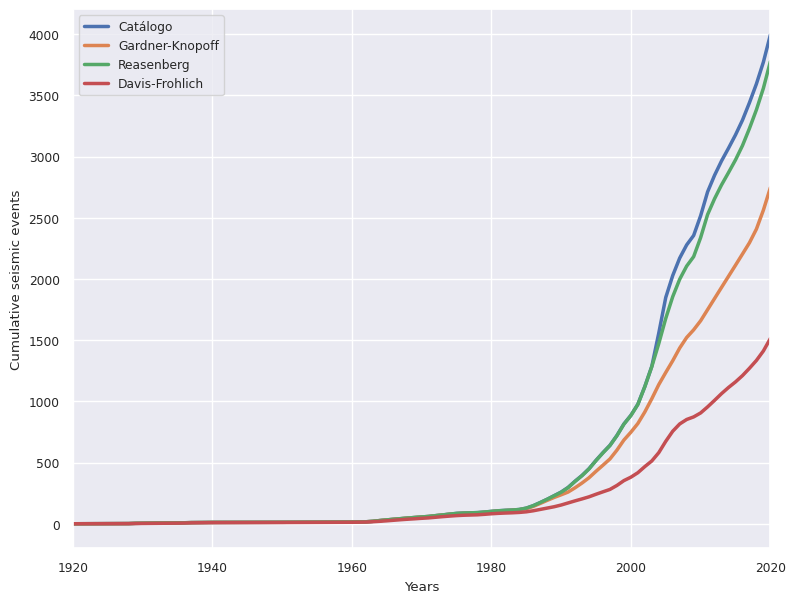

In [14]:
#datos del catálogo
bc=pd.read_csv("catálogo.csv")
gk=pd.read_csv("GK.csv")
rg=pd.read_csv("R.csv")
fh=pd.read_csv("FD.csv")

#nombro las columnas con las fechas ( adentro de los archivos estan en orden creciente todas)
yr1=bc.iloc[:,2]  #bc
yr2=gk.iloc[:,2]   #gk
yr3=rg.iloc[:,2]  #reasenberg
yr4=fh.iloc[:,2]   #frohlich
a=bc.iloc[:,5]
# Habilitamos la figura y establecemos ejes y título
plt.figure(figsize=(9,7))

#elegimos el tema y ademas los tamaños de los num en los ejes y el grosor de las lineas
sns.set_theme(font_scale=0.8, rc={"lines.linewidth": 2.5})

#se calculan los eventos acumulados con el comando "arrange"
p1 = np.arange(len(yr1))
p2 = np.arange(len(yr2))
p3 = np.arange(len(yr3))
p4 = np.arange(len(yr4))

#agrego al data frame de cada catálogo la columna creada con los acumulados
bc['Cumulative seismic events'] = p1
gk['Cumulative seismic events'] = p2
rg['Cumulative seismic events'] = p3
fh['Cumulative seismic events'] = p4

#grafico. A la primera la nombre para despues poder darle los limites en el eje x como esta abajo
a=sns.lineplot(data=bc,x="Years", y="Cumulative seismic events",legend="brief", label="Catálogo")
sns.lineplot(data=gk,x="Years", y="Cumulative seismic events",legend="brief", label="Gardner-Knopoff")
sns.lineplot(data=rg,x="Years", y="Cumulative seismic events",legend="brief", label="Reasenberg")
sns.lineplot(data=fh,x="Years", y="Cumulative seismic events",legend="brief", label="Davis-Frohlich")

#determino los limites para que grafique lo que quiero ver
a.set_xlim(1920, 2020)

#me muestra en pantalla esta info
print("CT tiene",len(p1), "eventos")
print("AC con Gardner quedan",len(p2),"eventos")
print("AC con Reasenberg quedan",len(p3),"eventos")
print("AC con Frohlich quedan",len(p4),"eventos")

plt.savefig("cumulative_seismic_events.png")